In [1]:
import pandas as pd
import os

### Data preprossing

In [2]:
os.chdir(r'C:\Users\fys86\Desktop\jupyter notebook\R study group\NBA\Data')
data = pd.read_csv('nba_draft_combine_all_years.csv')
data = data.drop('Unnamed: 0',1)
# pd.DataFrame(data.isnull().sum())
data.fillna(-999, inplace = True) # inplace = True:原df值有沒有被代替
data['Chosen'] = data['Draft pick']
data.loc[data['Chosen'] < 0, 'Chosen'] = 0
data.loc[data['Chosen'] > 0, 'Chosen'] = 1
#data.iloc[:,[2,-1]]
col = data.select_dtypes(include = 'object').columns
for x in col:
    data[x],_ = data[x].factorize()
data = data.drop('Draft pick',1)
data

,Player,Year,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Chosen
0,0,2009,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,-999.00,-999.00,22.0,10.95,3.28,1.0
1,1,2009,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,-999.00,-999.00,9.0,11.15,3.18,1.0
2,2,2009,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,-999.00,-999.00,8.0,11.17,3.14,1.0
3,3,2009,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,-999.00,-999.00,18.0,11.12,3.27,1.0
4,4,2009,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,-999.00,-999.00,5.0,11.17,3.35,1.0
5,5,2009,81.75,82.75,86.75,110.0,28.0,138.0,25.0,135.0,192.0,5.5,-999.00,-999.00,-999.0,12.11,3.55,1.0
6,6,2009,79.00,79.75,84.75,105.5,35.0,140.5,30.5,136.0,257.0,12.0,-999.00,-999.00,18.0,11.21,3.23,1.0
7,7,2009,75.25,76.25,79.00,100.5,34.0,134.5,28.5,129.0,199.0,6.3,-999.00,-999.00,6.0,10.64,3.21,1.0
8,8,2009,71.25,72.50,72.75,94.5,36.5,131.0,29.0,123.5,197.0,6.6,-999.00,-999.00,14.0,10.98,3.12,1.0
9,9,2009,72.25,73.50,79.50,98.5,36.5,135.0,30.5,129.0,175.0,4.5,-999.00,-999.00,13.0,11.05,3.18,1.0


### Memory reduction

In [3]:
# for float variable 
print(data.info())
for x in data.select_dtypes(include = 'float').columns:
    if data[x].dtype=='float64': data[x] = data[x].astype('float32')
for x in data.select_dtypes(include = 'integer').columns:
    if data[x].max()<128: data[x] = data[x].astype('int8')
    elif data[x].max()<32768: data[x] = data[x].astype('int16')
    else: data[x].astype('int32')
print(data.info())
# reduce 2.9 MB memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 18 columns):
Player                      517 non-null int64
Year                        517 non-null int64
Height (No Shoes)           517 non-null float64
Height (With Shoes)         517 non-null float64
Wingspan                    517 non-null float64
Standing reach              517 non-null float64
Vertical (Max)              517 non-null float64
Vertical (Max Reach)        517 non-null float64
Vertical (No Step)          517 non-null float64
Vertical (No Step Reach)    517 non-null float64
Weight                      517 non-null float64
Body Fat                    517 non-null float64
Hand (Length)               517 non-null float64
Hand (Width)                517 non-null float64
Bench                       517 non-null float64
Agility                     517 non-null float64
Sprint                      517 non-null float64
Chosen                      517 non-null float64
dtypes: float64(1

In [4]:
data.iloc[:,0] = data.iloc[:,0].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 18 columns):
Player                      517 non-null category
Year                        517 non-null int16
Height (No Shoes)           517 non-null float32
Height (With Shoes)         517 non-null float32
Wingspan                    517 non-null float32
Standing reach              517 non-null float32
Vertical (Max)              517 non-null float32
Vertical (Max Reach)        517 non-null float32
Vertical (No Step)          517 non-null float32
Vertical (No Step Reach)    517 non-null float32
Weight                      517 non-null float32
Body Fat                    517 non-null float32
Hand (Length)               517 non-null float32
Hand (Width)                517 non-null float32
Bench                       517 non-null float32
Agility                     517 non-null float32
Sprint                      517 non-null float32
Chosen                      517 non-null float32
dtypes: catego

In [5]:
# from collections import Counter
# result = Counter(data.Player)
# elements = list(result.elements())
# most_common = result.most_common()
# most_common # There are two Marcus Thornton

In [6]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [7]:
X = data.iloc[:,0:-1];y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)
params = {'boosting_type':'gbdt','objective':'regression','metric':{'l2','l1'},
         'num_leaves':31,'learning_rate':0.05,'feature_fraction':0.9,'bagging_fraction':0.9,
         'bagging_freq':5,'verbose':0}

In [9]:
gbm = lgb.train(params, lgb_train, num_boost_round = 100)

In [10]:
y_pred = gbm.predict(X_test)
y_pred

array([0.85170817, 0.60497341, 0.72178105, 0.92745192, 0.71729274,
       1.04368224, 0.64338479, 0.85843836, 0.74568895, 0.69582777,
       0.55928704, 1.03214205, 0.81399204, 0.57119146, 0.68090354,
       0.83092881, 0.74019918, 0.6822363 , 0.4938179 , 0.52419329,
       0.77903732, 0.93005523, 0.89622514, 0.73950069, 0.95385375,
       0.77647841, 0.57577381, 0.5594914 , 1.08493245, 0.88789153,
       0.40838513, 0.71912636, 0.97109133, 1.13767739, 0.62177598,
       0.59746336, 0.77455206, 0.55466155, 0.54688723, 0.55100406,
       0.58413052, 1.05698296, 1.05927153, 0.9085404 , 0.79510073,
       0.8393068 , 0.5175873 , 0.73989406, 0.48681486, 0.77575649,
       0.68510136, 0.61017388, 1.01840294, 0.77591418, 0.45095099,
       0.58049642, 0.76401465, 1.07842715, 0.77429955, 0.89818352,
       0.62123106, 0.77244645, 0.64820053, 0.46366563, 0.87287848,
       0.64681351, 0.77981976, 0.870116  , 0.62710237, 0.80344659,
       0.4377701 , 0.56310227, 0.69766967, 0.8440162 , 0.79956

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import sklearn.metrics
import numpy as np

In [12]:
print('The rmse of prediction is: ', mean_squared_error(y_test,y_pred))

The rmse of prediction is:  0.18321995276573988


In [13]:
confusion_matrix(y_test.round(),y_pred.round())

array([[ 3, 18],
       [ 6, 77]], dtype=int64)

In [34]:
score = precision_recall_fscore_support(np.array(y_test),np.array(y_pred.round()))
# precision(預測為0中真的為0) = 3/9, recall(真的為0中預測為0) = 3/21
precision = score[0][0]
recall = score[1][0]
AUC = roc_auc_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred.round())

In [45]:
df = pd.DataFrame({'accuracy':accuracy,'precision':precision,'recall':recall,'AUC':AUC}, index = ['values']).T
df

,values
accuracy,0.769231
precision,0.333333
recall,0.142857
AUC,0.581756


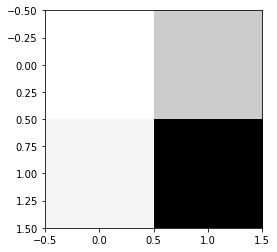

In [16]:
import matplotlib.pyplot as plt
conf = sklearn.metrics.confusion_matrix(y_test, y_pred.round())
plt.imshow(conf, cmap='binary', interpolation='None')
# plt.show()
